# Ejercicio 1: Análisis Exploratorio de Datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

precios_2021 = pd.read_excel('PRECIOS 2021.xlsx', engine='openpyxl')
precios_2022 = pd.read_excel('PRECIOS 2022.xlsx', engine='openpyxl')
precios_2023 = pd.read_excel('PRECIOS 2023.xlsx', engine='openpyxl')
precios_2024 = pd.read_excel('PRECIOS 2024.xlsx', engine='openpyxl')

consumo = pd.read_excel('CONSUMO.xlsx', engine='openpyxl')
importacion = pd.read_excel('IMPORTACION.xlsx', engine='openpyxl')

In [5]:
# Unificar datos de precios
precios = pd.concat([precios_2021, precios_2022, precios_2023, precios_2024], ignore_index=True)

# Convertir columnas de fecha a datetime
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b/%Y')
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'], format='%b/%Y')
precios['FECHA'] = pd.to_datetime(precios['FECHA'], format='%d/%b/%Y')

In [6]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.476190,1426.0,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0,1.750545e+06
1,2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.552381,1458.0,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0,1.773220e+06
2,2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.066667,1503.0,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0,1.909499e+06
3,2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.607143,1561.0,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0,1.800933e+06
4,2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.147619,1642.0,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0,1.941772e+06


In [7]:
importacion.head()


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.738095,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402,0.0,715344,2.312639e+06
1,2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.380952,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0,0.0,370166,1.769209e+06
2,2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.371429,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0,0.0,360530,1.945770e+06
3,2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.642857,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184,0.0,359527,1.623638e+06
4,2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.861905,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680,0.0,723346,2.262727e+06


In [8]:
precios.head()

,FECHA,Tipo de Cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.
0,2021-01-01,7.79382,21.91,21.11,17.61,13.40,99.0
1,2021-01-02,7.79382,21.91,21.11,17.61,13.40,99.0
2,2021-01-03,7.79382,21.91,21.11,17.61,13.40,99.0
3,2021-01-04,7.79417,21.91,21.11,17.61,13.45,99.0
4,2021-01-05,7.79369,21.91,21.11,17.61,13.45,99.0


In [9]:
consumo_seleccionado = consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_seleccionado = importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_seleccionado = precios[['FECHA', 'Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']]


In [10]:
consumo_seleccionado.set_index('Fecha', inplace=True)
importacion_seleccionado.set_index('Fecha', inplace=True)
precios_seleccionado.set_index('FECHA', inplace=True)

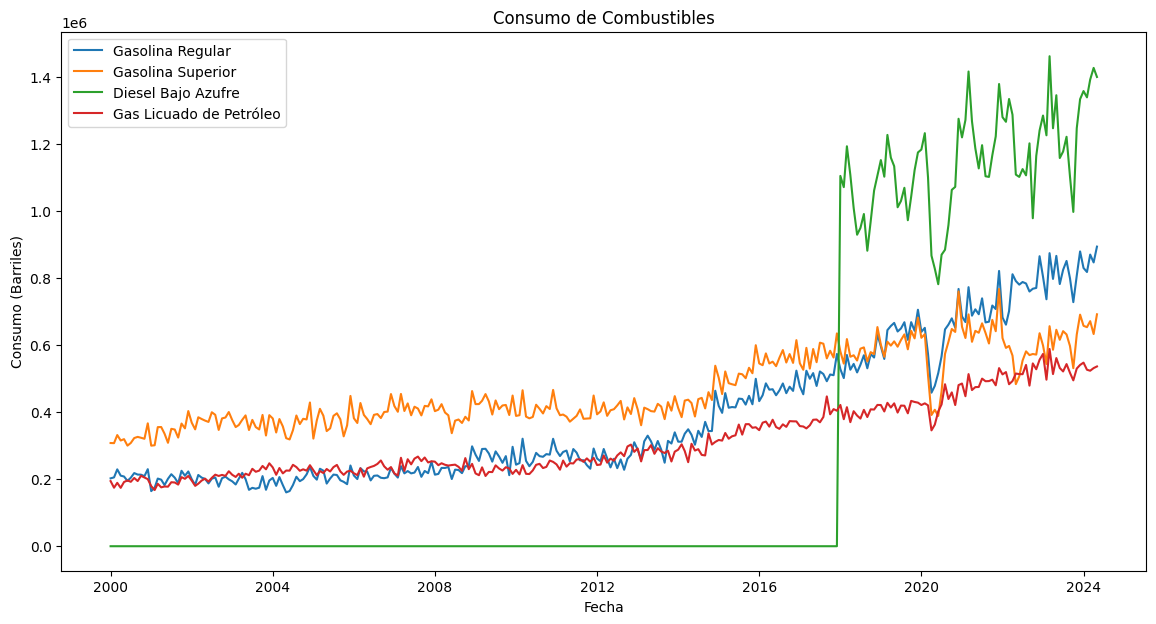

In [11]:
# Gráficos de consumo
plt.figure(figsize=(14, 7))
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gasolina superior'], label='Gasolina Superior')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(consumo_seleccionado.index, consumo_seleccionado['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Consumo de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo (Barriles)')
plt.legend()
plt.show()

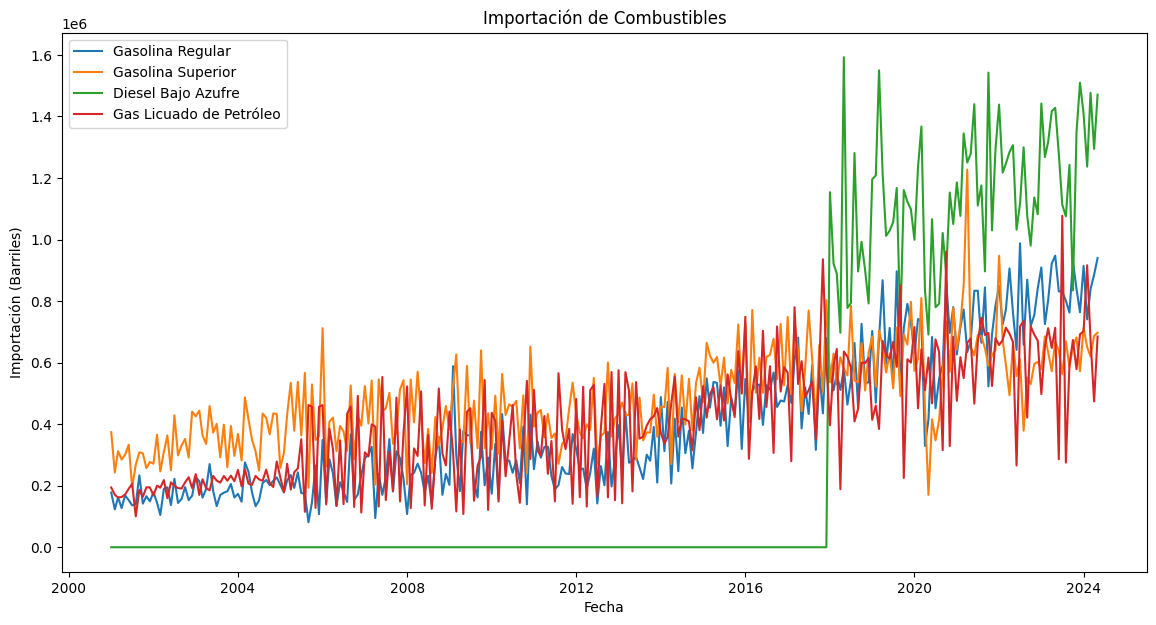

In [12]:
# Gráficos de importación
plt.figure(figsize=(14, 7))
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gasolina regular'], label='Gasolina Regular')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gasolina superior'], label='Gasolina Superior')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(importacion_seleccionado.index, importacion_seleccionado['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Importación de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Importación (Barriles)')
plt.legend()
plt.show()

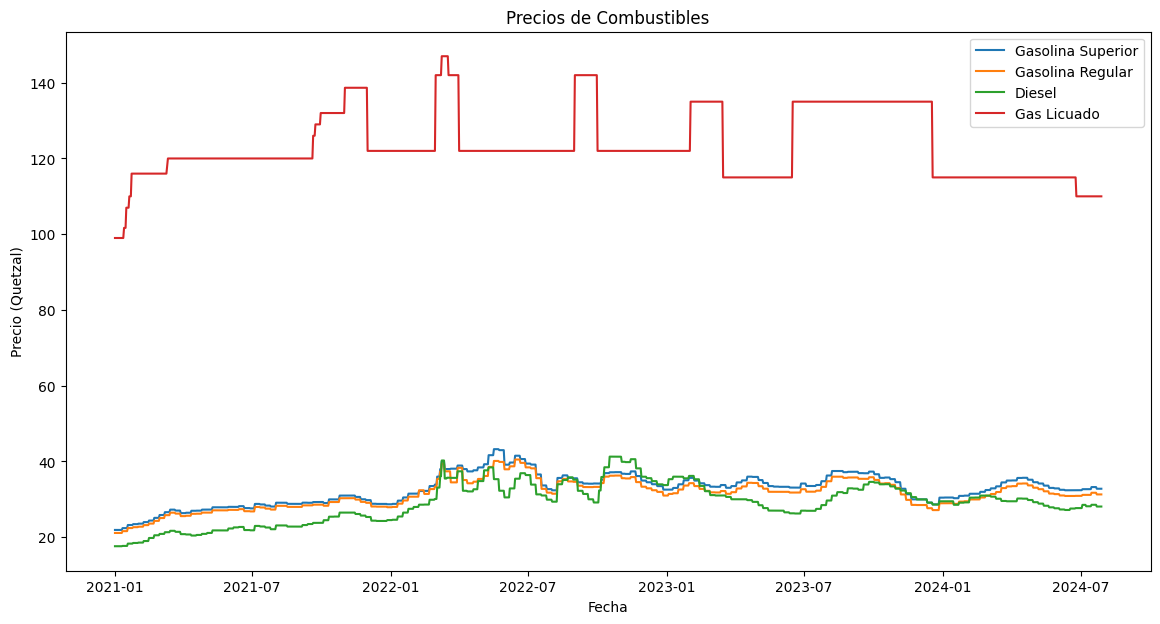

In [13]:
# Gráficos de precios
plt.figure(figsize=(14, 7))
plt.plot(precios_seleccionado.index, precios_seleccionado['Superior'], label='Gasolina Superior')
plt.plot(precios_seleccionado.index, precios_seleccionado['Regular'], label='Gasolina Regular')
plt.plot(precios_seleccionado.index, precios_seleccionado['Diesel'], label='Diesel')
plt.plot(precios_seleccionado.index, precios_seleccionado['Glp Cilindro 25Lbs.'], label='Gas Licuado')
plt.title('Precios de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Precio (Quetzal)')
plt.legend()
plt.show()

In [14]:
consumo_seleccionado.describe()

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
count,293.000000,293.000000,2.930000e+02,293.000000
mean,386490.157486,464562.247013,3.014601e+05,312350.791082
std,209541.304568,108349.195858,5.115677e+05,109315.234878
min,160741.900000,300242.781667,0.000000e+00,167818.137897
25%,214509.650000,382078.880000,0.000000e+00,225886.426190
50%,285089.040000,420238.710000,0.000000e+00,262255.138095
75%,524242.310000,565665.720000,8.703549e+05,393901.921429
max,894533.140000,768102.830000,1.463008e+06,588892.160000


In [15]:
importacion_seleccionado.describe()


,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
count,281.000000,2.810000e+02,2.810000e+02,2.810000e+02
mean,401433.017451,4.853736e+05,3.135770e+05,4.091257e+05
std,234159.202453,1.539939e+05,5.242396e+05,1.973531e+05
min,81015.300000,1.702925e+05,0.000000e+00,1.005615e+05
25%,205624.080000,3.668863e+05,0.000000e+00,2.252070e+05
50%,320566.690000,4.704840e+05,0.000000e+00,4.100011e+05
75%,548714.530000,5.958704e+05,7.921987e+05,5.656279e+05
max,987872.050000,1.227174e+06,1.592580e+06,1.077123e+06


In [16]:
precios_seleccionado.describe()


,Superior,Regular,Diesel,Glp Cilindro 25Lbs.
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,32.652460,31.402605,28.988874,123.245295
std,4.117072,3.836911,5.313549,8.972130
min,21.910000,21.110000,17.610000,99.000000
25%,29.270000,28.490000,25.410000,115.000000
50%,33.080000,31.780000,29.370000,122.000000
75%,35.640000,34.160000,32.650000,132.000000
max,43.240000,40.500000,41.270000,147.000000


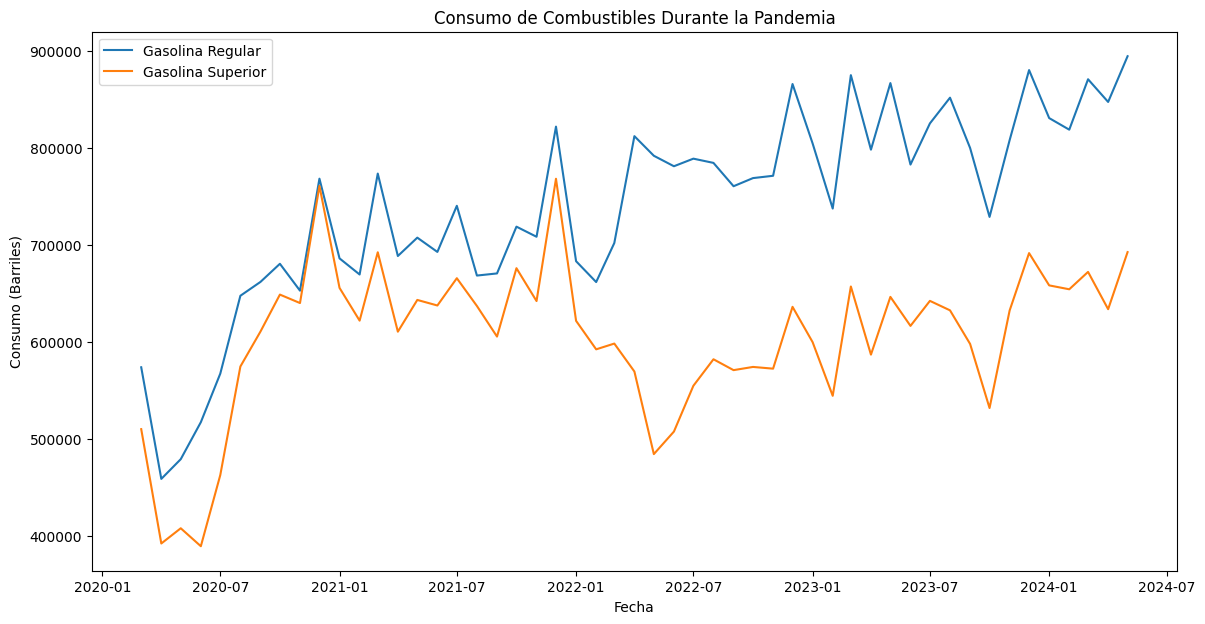

In [17]:
# Filtrar datos de la pandemia (marzo 2020 en adelante)
inicio_pandemia = '2020-03-01'
fin_pandemia = '2024-05-31'

consumo_pandemia = consumo_seleccionado[inicio_pandemia:fin_pandemia]
importacion_pandemia = importacion_seleccionado[inicio_pandemia:fin_pandemia]
precios_pandemia = precios_seleccionado[inicio_pandemia:fin_pandemia]

# Gráficos de pandemia
plt.figure(figsize=(14, 7))
plt.plot(consumo_pandemia.index, consumo_pandemia['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_pandemia.index, consumo_pandemia['Gasolina superior'], label='Gasolina Superior')
plt.title('Consumo de Combustibles Durante la Pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (Barriles)')
plt.legend()
plt.show()


# 2. Análisis de Series Temporales

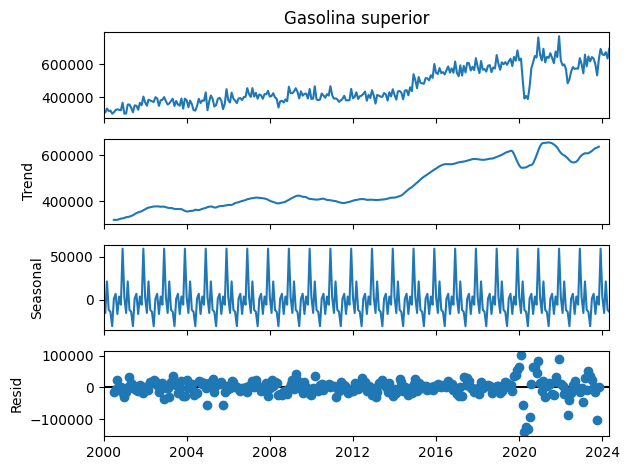

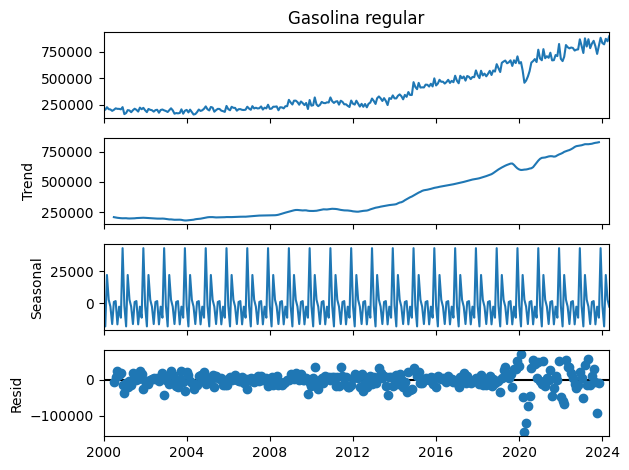

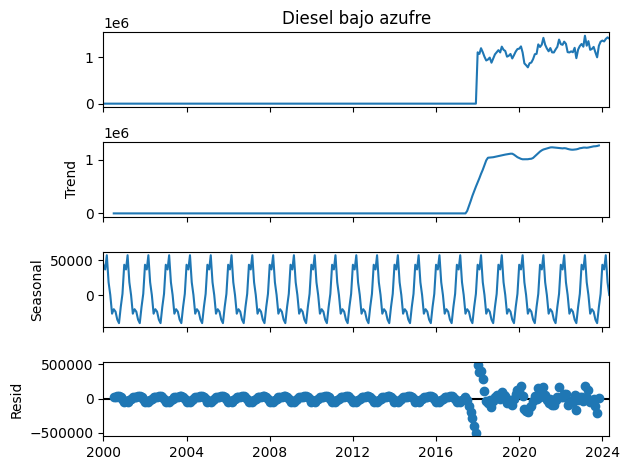

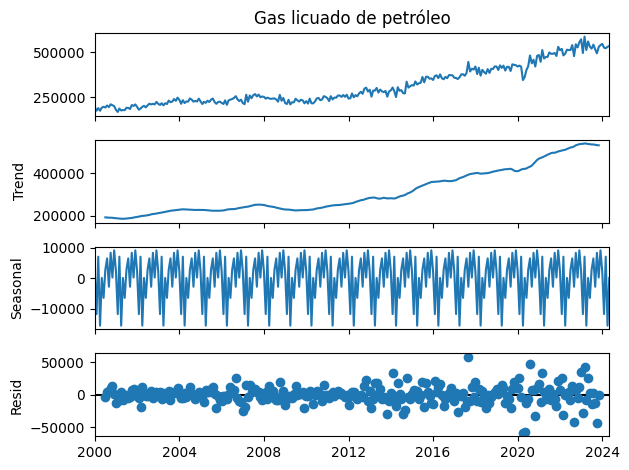

In [18]:
# Selección de series
serie_gasolina_super = consumo_seleccionado['Gasolina superior']
serie_gasolina_regular = consumo_seleccionado['Gasolina regular']
serie_diesel = consumo_seleccionado['Diesel bajo azufre']
serie_gas_lp = consumo_seleccionado['Gas licuado de petróleo']

# Descomposición
def descomponer_serie(serie):
    decomposition = seasonal_decompose(serie.dropna(), model='additive')
    decomposition.plot()
    plt.show()
    return decomposition

# Descomposición de series
decomp_gasolina_super = descomponer_serie(serie_gasolina_super)
decomp_gasolina_regular = descomponer_serie(serie_gasolina_regular)
decomp_diesel = descomponer_serie(serie_diesel)
decomp_gas_lp = descomponer_serie(serie_gas_lp)


In [19]:
# Prueba de Dickey-Fuller aumentada
def prueba_dickey_fuller(serie):
    result = adfuller(serie.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Aplicar prueba
print("Gasolina Superior")
prueba_dickey_fuller(serie_gasolina_super)
print("\nGasolina Regular")
prueba_dickey_fuller(serie_gasolina_regular)
print("\nDiesel")
prueba_dickey_fuller(serie_diesel)
print("\nGas Licuado")
prueba_dickey_fuller(serie_gas_lp)


Gasolina Superior
ADF Statistic: -0.6787829834154696
p-value: 0.8521689503946175
Critical Values: {'1%': -3.453922368485787, '5%': -2.871918329081633, '10%': -2.5723001147959184}

Gasolina Regular
ADF Statistic: 2.7124136492396667
p-value: 0.9990875733155129
Critical Values: {'1%': -3.4540935579190495, '5%': -2.8719934111688965, '10%': -2.5723401594120388}

Diesel
ADF Statistic: -0.415632656497601
p-value: 0.9074557821510758
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}

Gas Licuado
ADF Statistic: 0.8662148782601542
p-value: 0.9926331955934964
Critical Values: {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3501.875
Date:                Thu, 01 Aug 2024   AIC                           7009.750
Time:                        23:45:50   BIC                           7020.781
Sample:                    01-01-2000   HQIC                          7014.169
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3753      0.062      6.017      0.000       0.253       0.498
ma.L1         -0.7725      0.051    -15.286      0.000      -0.872      -0.673
sigma2      1.499e+09   1.58e-11    9.5e+19      0.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\P

                               SARIMAX Results                                
Dep. Variable:     Diesel bajo azufre   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3719.661
Date:                Thu, 01 Aug 2024   AIC                           7445.321
Time:                        23:45:51   BIC                           7456.352
Sample:                    01-01-2000   HQIC                          7449.740
                         - 05-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6766      0.273     -2.479      0.013      -1.212      -0.142
ma.L1          0.5871      0.303      1.937      0.053      -0.007       1.181
sigma2      6.879e+09   6.76e-12   1.02e+21      0.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                  Gasolina superior   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3307.215
Date:                            Thu, 01 Aug 2024   AIC                           6624.429
Time:                                    23:45:53   BIC                           6642.603
Sample:                                01-01-2000   HQIC                          6631.719
                                     - 05-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0083      0.453     -0.018      0.985      -0.897       0.880
ma.L1         -0.1957      0.454   

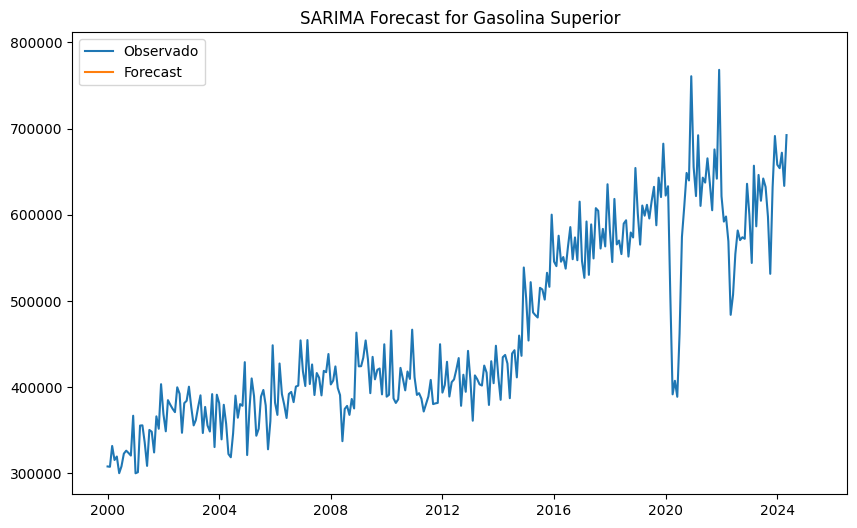

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   Gasolina regular   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3288.397
Date:                            Thu, 01 Aug 2024   AIC                           6586.795
Time:                                    23:45:59   BIC                           6604.969
Sample:                                01-01-2000   HQIC                          6594.084
                                     - 05-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4025      0.173      2.327      0.020       0.063       0.741
ma.L1         -0.6935      0.159   

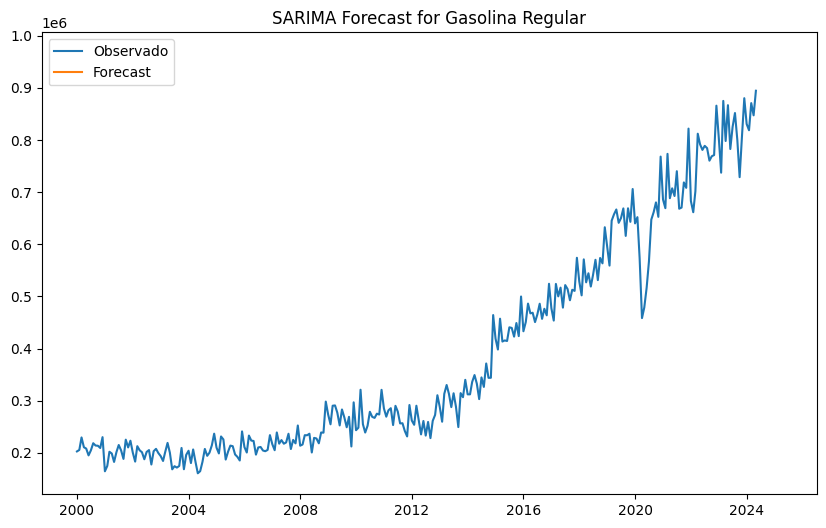

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


                                     SARIMAX Results                                      
Dep. Variable:                 Diesel bajo azufre   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3589.023
Date:                            Thu, 01 Aug 2024   AIC                           7188.047
Time:                                    23:46:01   BIC                           7206.220
Sample:                                01-01-2000   HQIC                          7195.336
                                     - 05-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3872      0.630     -0.615      0.539      -1.621       0.847
ma.L1          0.2551      0.654   

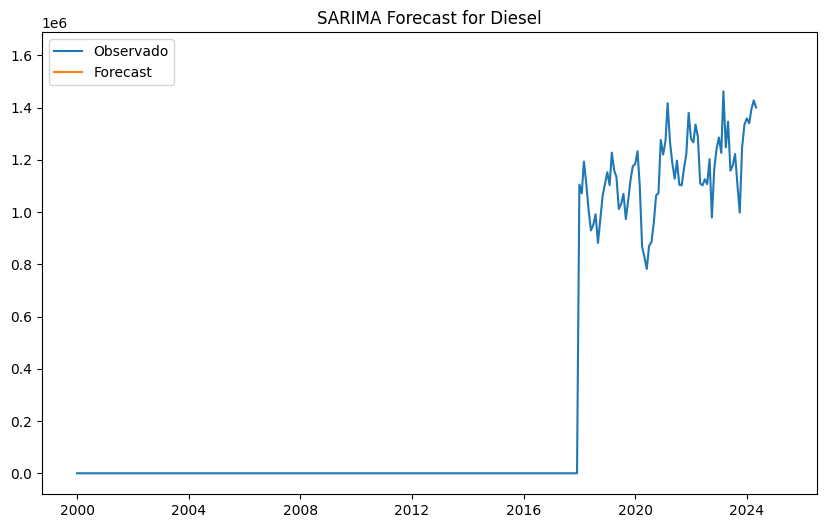

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:            Gas licuado de petróleo   No. Observations:                  293
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3168.428
Date:                            Thu, 01 Aug 2024   AIC                           6346.856
Time:                                    23:46:04   BIC                           6365.030
Sample:                                01-01-2000   HQIC                          6354.146
                                     - 05-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1064      0.188     -0.565      0.572      -0.475       0.262
ma.L1         -0.3822      0.176   

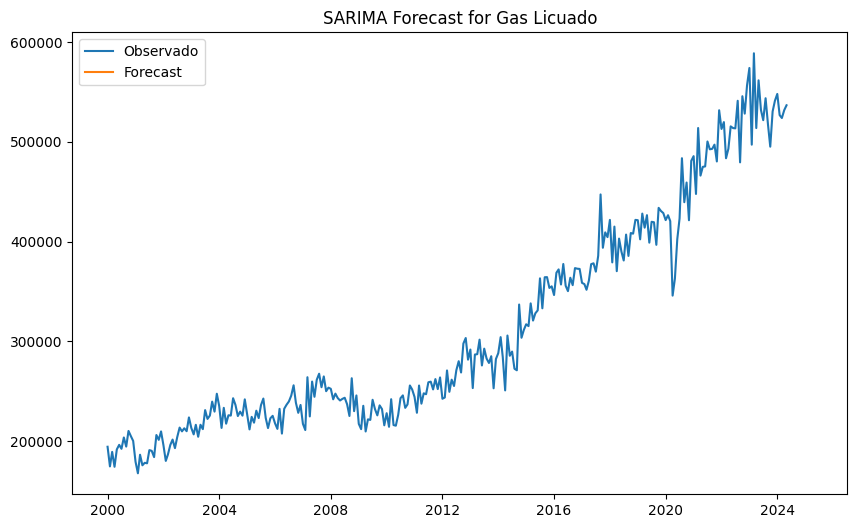

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelado ARIMA
def modelo_arima(serie):
    model = ARIMA(serie.dropna(), order=(1,1,1)) # Ajusta los parámetros (p,d,q) según sea necesario
    model_fit = model.fit()
    print(model_fit.summary())
    return model_fit

# Ajustar modelos ARIMA
arima_gasolina_super = modelo_arima(serie_gasolina_super)
arima_gasolina_regular = modelo_arima(serie_gasolina_regular)
arima_diesel = modelo_arima(serie_diesel)
arima_gas_lp = modelo_arima(serie_gas_lp)

# Modelado SARIMA
def modelo_sarima(serie, nombre):
    model = SARIMAX(serie.dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) # Ajusta los parámetros (p,d,q) y (P,D,Q,s) según sea necesario
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
    
    # Realizar predicciones
    future_steps = 365  # Ajusta según sea necesario
    forecast = model_fit.get_forecast(steps=future_steps)
    forecast_index = pd.date_range(start=serie.index[-1], periods=future_steps, freq='D')
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
    
    # Graficar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(serie, label='Observado')
    plt.plot(forecast_series, label='Forecast')
    plt.title(f'SARIMA Forecast for {nombre}')
    plt.legend()
    plt.show()
    
    return model_fit

# Ajustar modelos SARIMA
sarima_gasolina_super = modelo_sarima(serie_gasolina_super, 'Gasolina Superior')
sarima_gasolina_regular = modelo_sarima(serie_gasolina_regular, 'Gasolina Regular')
sarima_diesel = modelo_sarima(serie_diesel, 'Diesel')
sarima_gas_lp = modelo_sarima(serie_gas_lp, 'Gas Licuado')
